# Data 불러오기

In [2]:
# 끝자리가 7로 끝나는 데이터만 가져오기
data = open("data.log", "r")
data_log = []
i = 0

for line in data:
    i += 1
    if i<459:
        if i % 10 == 7:
            data_log.append((line))
    else:
        if i % 10 == 1:
            data_log.append((line))

print(data_log[0])

-7,1,-60,128,174,38,-53,44,75,-86,-3,-133,-50,91,74,138,98,-5,80,8,18,55,33,17,43,85,21,120,39,151,79,-118,-88,-44,-56,58,25,24,1,-5,75,83,-35,26,26,79,59,110,197,318,407,102,-258,-336,-129,245,253,-78,-346,-145,76,102,59,117,66,56,57,115,77,51,161,-31,-4,23,196,140,-144,-79,78,171,-20,-55,-123,-181,-30,76,64,-63,-118,-31,159,1,-9,35,244,247,24,-139,46,163,16,18,18,86,184,-59,-146,-105,146,338,100,-163,-43,237,218,33,51,223,301,103,-160,-48,-27,56,-109,65,37,1,-25,57,198,145,-22,-165,-282,-79,141,134,-45,154,189,132,23,-111,149,122,9,-18,134,60,-73,-40,-8,145,161,89,15,93,85,90,83,69,52,41,62,124,92,71,54,110,28,-66,136,27,-66,-60,43,66,103,-61,155,52,78,41,-73,87,95,-112,-119,35,75,-7,-258,-236,62,255,144,73,4,190,130,50,-18,38,113,91,-19,73,69,96,-55,-83,-30,89,18,100,154,214,135,97,31,28,51,104,124,171,39,2,98,24,-33,0,8,102,112,-26,13,32,50,28,36,39,179,80,0,33,165,139,133,26,-88,55,76,77,109,134,106,139,40,36,49,122,-77,-121,-109,48,61,59,38,-3,-24,55,121,31,-13,111,52,124,-15,-44

In [3]:
# 데이터의 개수 출력    
len(data_log)

101

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [5]:
data_log = pd.DataFrame(data_log)
print(data_log.shape)
data_log.head()

(101, 1)


,0
0,"-7,1,-60,128,174,38,-53,44,75,-86,-3,-133,-50,..."
1,"74,114,110,123,151,143,118,-66,-27,48,26,-52,-..."
2,"-1,161,138,-201,-143,177,23,-135,233,90,-13,18..."
3,"-46,-115,-75,-18,9,-31,-25,36,71,85,14,46,80,4..."
4,"-34,28,60,-59,-20,45,66,74,41,-83,45,111,151,8..."


In [6]:
data_log[0][45]

'\n'

In [7]:
print(len(data_log[0][0]))
print(len(data_log[0][1]))

3711
3685


In [8]:
# 빈 문자열을 제외하고 숫자로만 구성된 문자열을 정수로 변환
data_sample = [int(x) for x in data_log[0][0].strip().split(",") if x]
print(data_sample)
len(data_sample)

[-7, 1, -60, 128, 174, 38, -53, 44, 75, -86, -3, -133, -50, 91, 74, 138, 98, -5, 80, 8, 18, 55, 33, 17, 43, 85, 21, 120, 39, 151, 79, -118, -88, -44, -56, 58, 25, 24, 1, -5, 75, 83, -35, 26, 26, 79, 59, 110, 197, 318, 407, 102, -258, -336, -129, 245, 253, -78, -346, -145, 76, 102, 59, 117, 66, 56, 57, 115, 77, 51, 161, -31, -4, 23, 196, 140, -144, -79, 78, 171, -20, -55, -123, -181, -30, 76, 64, -63, -118, -31, 159, 1, -9, 35, 244, 247, 24, -139, 46, 163, 16, 18, 18, 86, 184, -59, -146, -105, 146, 338, 100, -163, -43, 237, 218, 33, 51, 223, 301, 103, -160, -48, -27, 56, -109, 65, 37, 1, -25, 57, 198, 145, -22, -165, -282, -79, 141, 134, -45, 154, 189, 132, 23, -111, 149, 122, 9, -18, 134, 60, -73, -40, -8, 145, 161, 89, 15, 93, 85, 90, 83, 69, 52, 41, 62, 124, 92, 71, 54, 110, 28, -66, 136, 27, -66, -60, 43, 66, 103, -61, 155, 52, 78, 41, -73, 87, 95, -112, -119, 35, 75, -7, -258, -236, 62, 255, 144, 73, 4, 190, 130, 50, -18, 38, 113, 91, -19, 73, 69, 96, -55, -83, -30, 89, 18, 100, 15

1016

<Axes: >

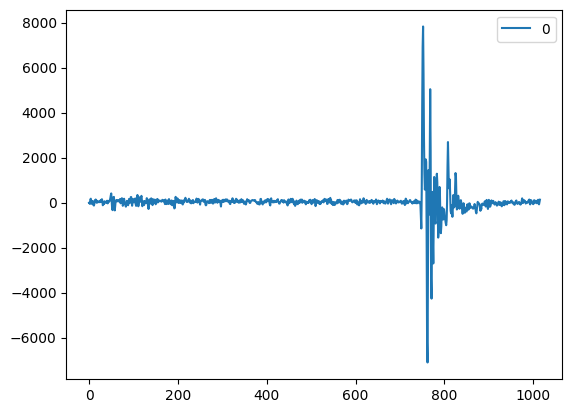

In [9]:
data_sample = pd.DataFrame(data_sample)
data_sample.plot()

In [10]:
data_after_pick = []
raw_data = []

for i in range(len(data_log)):
    data_sample = [int(x) for x in data_log[0][i].strip().split(",") if x]
    index = 0
    for k in range(len(data_sample)):
        if data_sample[k] > 1000:
            index = k
            break
    raw_data.append(data_sample)
    data_sample = data_sample[index:index+250]
    data_after_pick.append(data_sample)

In [11]:
print(len(data_after_pick))
print(len(data_after_pick[0]))
print(len(raw_data))
print(len(raw_data[0]))

101
250
101
1016


In [12]:
# raw_data를 파일에 저장하기
raw_data = pd.DataFrame(raw_data)
raw_data.to_csv("raw_data.csv", index=False)
data_after_pick = pd.DataFrame(data_after_pick)
data_after_pick.to_csv("data_after_pick.csv", index=False)

In [13]:
raw_data

,0,1,2,3,4,5,6,7,8,9,...,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015
0,-7.0,1.0,-60.0,128.0,174.0,38.0,-53.0,44.0,75.0,-86.0,...,84.0,11.0,-29.0,51.0,67.0,127.0,-43.0,-77.0,35.0,129.0
1,74.0,114.0,110.0,123.0,151.0,143.0,118.0,-66.0,-27.0,48.0,...,74.0,25.0,183.0,83.0,25.0,-13.0,59.0,75.0,-41.0,-107.0
2,-1.0,161.0,138.0,-201.0,-143.0,177.0,23.0,-135.0,233.0,90.0,...,-32.0,-23.0,96.0,-39.0,121.0,167.0,70.0,-91.0,89.0,78.0
3,-46.0,-115.0,-75.0,-18.0,9.0,-31.0,-25.0,36.0,71.0,85.0,...,31.0,-40.0,-41.0,57.0,82.0,-41.0,21.0,21.0,99.0,-56.0
4,-34.0,28.0,60.0,-59.0,-20.0,45.0,66.0,74.0,41.0,-83.0,...,-18.0,115.0,222.0,91.0,204.0,9.0,-127.0,3.0,63.0,-87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-161.0,-54.0,105.0,77.0,156.0,36.0,127.0,66.0,-38.0,-38.0,...,44.0,-87.0,-15.0,-34.0,74.0,-32.0,43.0,168.0,161.0,13.0
97,34.0,10.0,16.0,-3.0,74.0,80.0,17.0,3.0,-3.0,19.0,...,-7.0,215.0,73.0,40.0,-2.0,21.0,150.0,-22.0,-38.0,78.0
98,72.0,32.0,155.0,64.0,102.0,19.0,-63.0,-19.0,32.0,53.0,...,22.0,64.0,34.0,-20.0,121.0,33.0,-33.0,34.0,-10.0,25.0
99,116.0,56.0,0.0,16.0,-12.0,-45.0,39.0,10.0,-4.0,94.0,...,150.0,87.0,175.0,-25.0,-123.0,26.0,104.0,46.0,47.0,123.0


# CIR-Based Device-Free People Counting via UWB Signals

In those Figures, CIRs have been averaged over the captured frames (i.e., 1768) and plotted from sample 740 to sample 800 of the 1000-samples long vector extracted from the device. It is worth highlighting that before sample 740, CIR amplitudes stored in the extracted CIR vector are zero. Moreover, from Figure 3 and Figure 4, it is evident that already before sample 800, there are no more significant signal replicas and the CIR vector contains mainly noise. Therefore, in the following, we work with 60 samples long CIR vectors (from sample 740 to sample 800).

In [14]:
raw_data.shape

(101, 1016)

<Axes: >

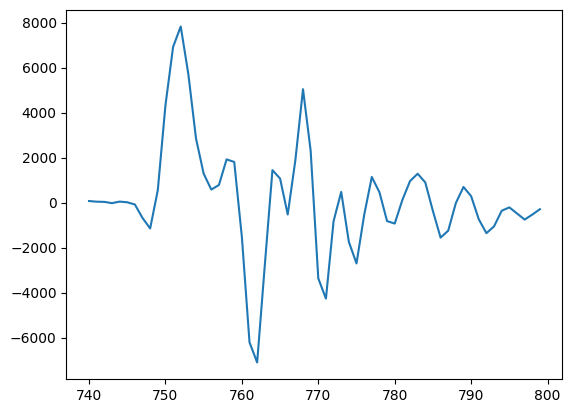

In [15]:
# raw_data의 첫번째 행을 그래프로 그리기
raw_data.iloc[0][740:800].plot()

<Axes: >

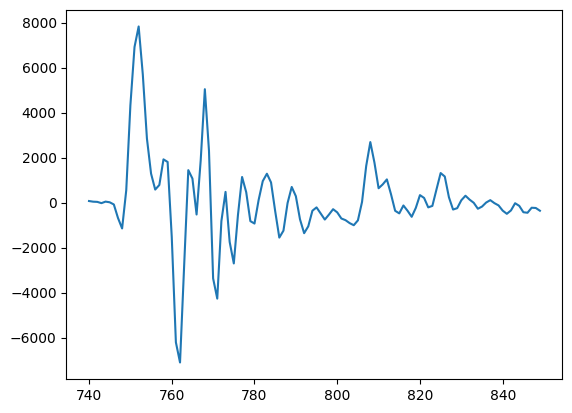

In [16]:
raw_data.iloc[0][740:850].plot()

논문에서는 800이후를 버렸지만 850까지 보겠음  
다음은 empty 상황의 초반 10개

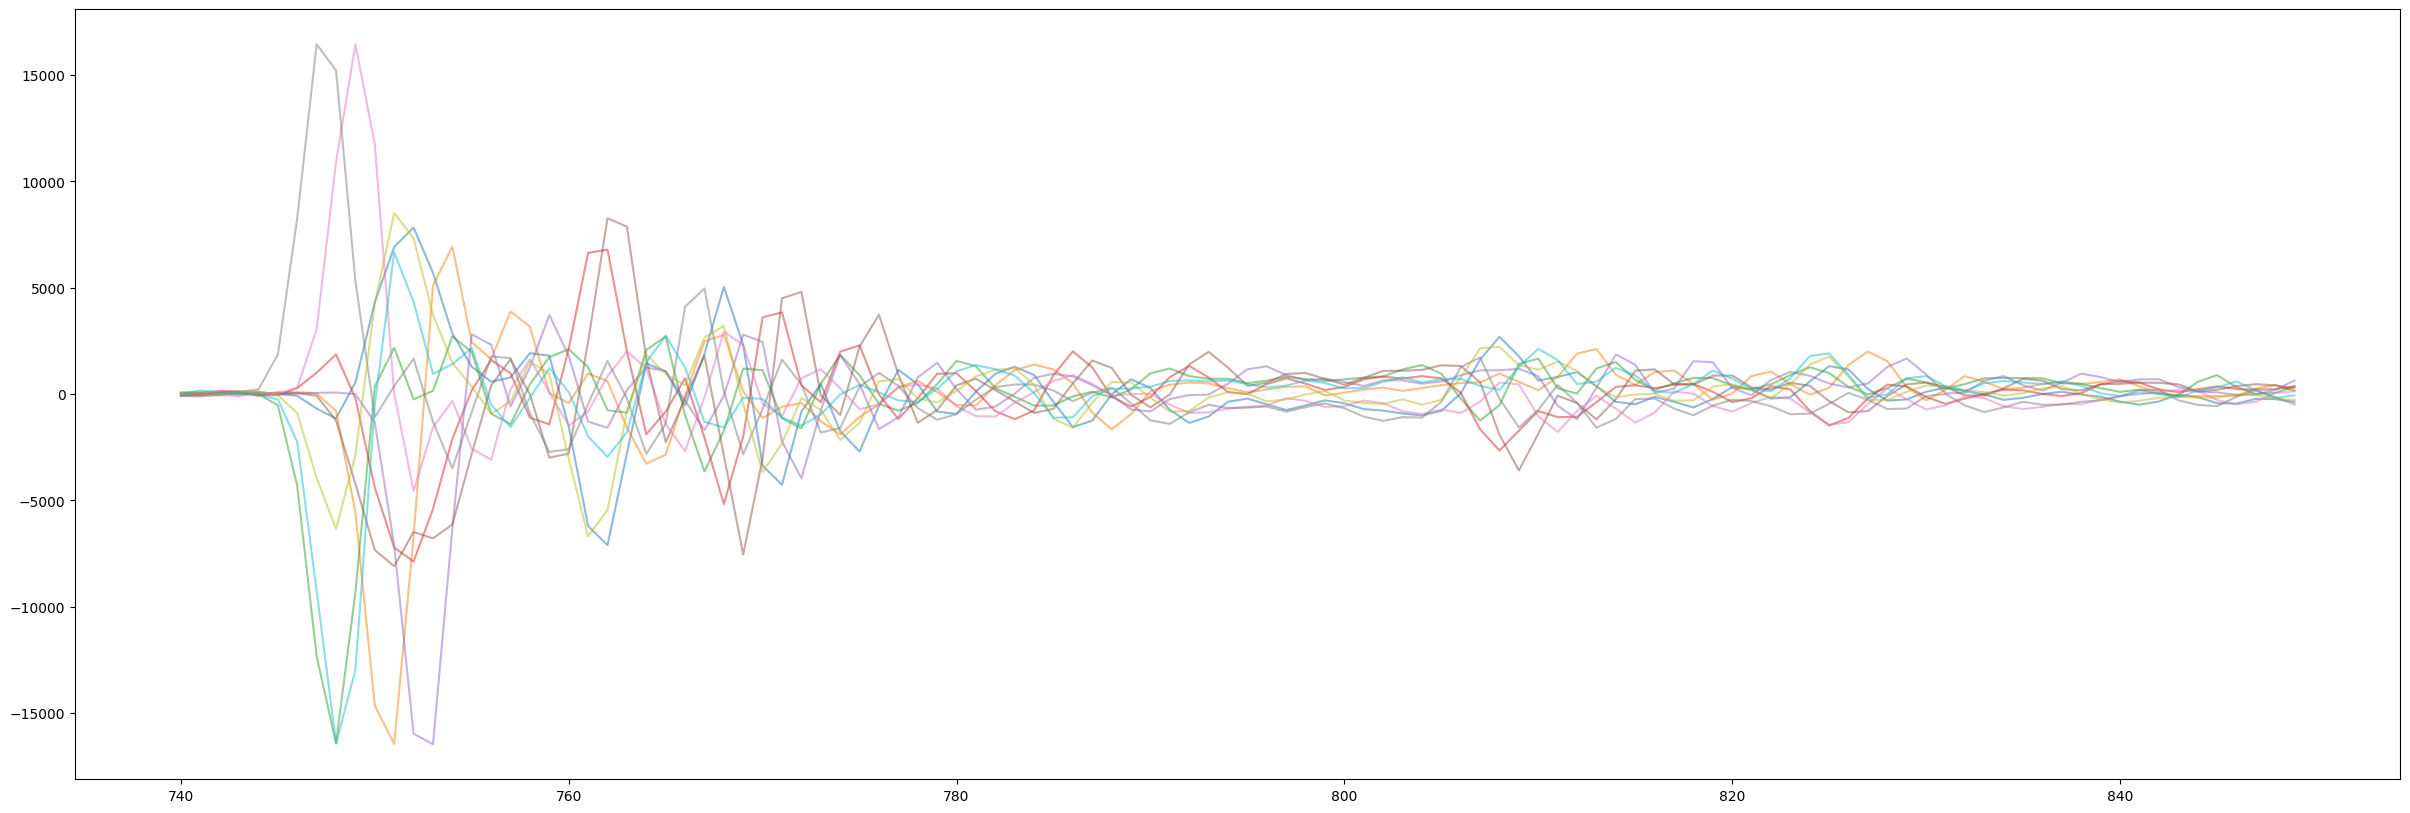

In [17]:
plt.figure(figsize=(30, 10))

for i in range(10):
    # 투명도 0.5로 그래프 그리기
    # matplotlib의 plot 함수를 사용
    plt.plot(raw_data.iloc[i][740:850], alpha=0.5)
plt.show()

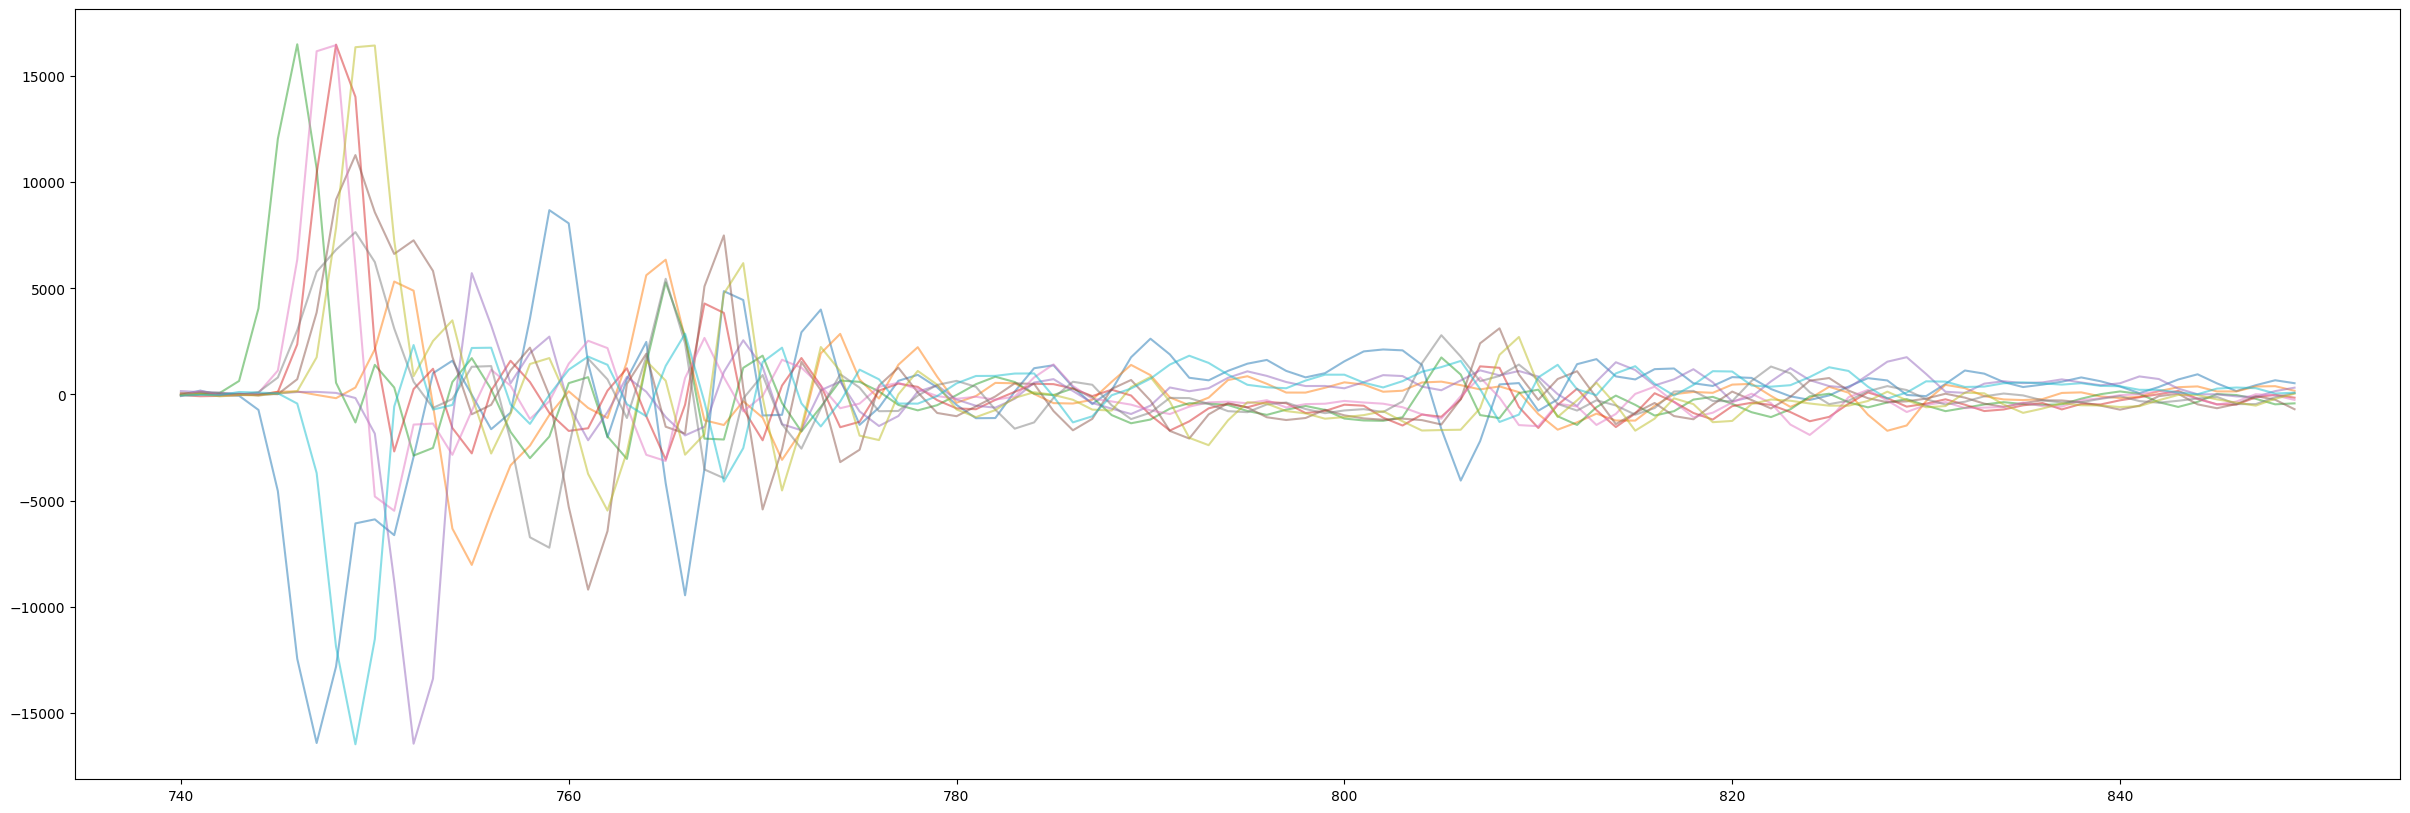

In [18]:
plt.figure(figsize=(30, 10))
for i in range(1,11):
    plt.plot(raw_data.iloc[-i][740:850], alpha=0.5)
plt.show()

## Normalized

In [19]:
# 각 행을 정규화
normalized_data = raw_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015
0,0.475352,0.475887,0.471802,0.484394,0.487475,0.478366,0.472271,0.478768,0.480844,0.470060,...,0.481447,0.476557,0.473878,0.479236,0.480308,0.484327,0.472940,0.470663,0.478165,0.484461
1,0.706614,0.708324,0.708153,0.708709,0.709906,0.709564,0.708495,0.700629,0.702296,0.705503,...,0.706614,0.704519,0.711275,0.706999,0.704519,0.702895,0.705973,0.706657,0.701697,0.698876
2,0.858053,0.866517,0.865315,0.847605,0.850635,0.867353,0.859307,0.851053,0.870278,0.862808,...,0.856434,0.856904,0.863121,0.856068,0.864427,0.866830,0.861763,0.853351,0.862755,0.862181
3,0.533683,0.528979,0.531706,0.535593,0.537434,0.534706,0.535115,0.539275,0.541661,0.542616,...,0.538934,0.534092,0.534024,0.540706,0.542411,0.534024,0.538252,0.538252,0.543570,0.533002
4,0.814079,0.817151,0.818736,0.812841,0.814773,0.817993,0.819033,0.819429,0.817795,0.811652,...,0.814872,0.821460,0.826761,0.820271,0.825869,0.816209,0.809472,0.815912,0.818884,0.811453


<Axes: >

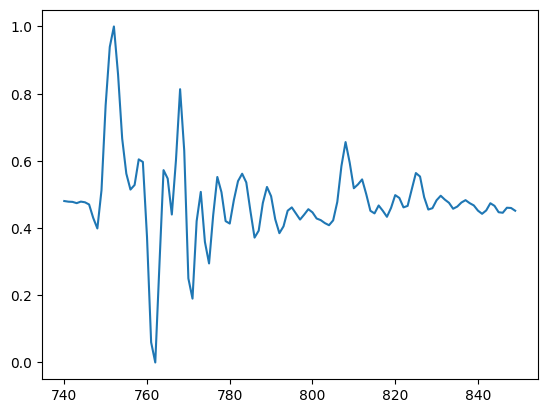

In [20]:
normalized_data.iloc[0][740:850].plot()

그냥 정규화 하면 논문에서의 데이터와 약간 모양이 다름, 그래서 residual을 갖고, 정규화 하겠음

## Residual Normalized

In [21]:
residual = pd.DataFrame()

# raw_data의 마지막 열을 제외한 모든 열에 대해 반복
for i in range(raw_data.shape[1] - 1):
    # 현재 열과 다음 열의 차이를 계산하고 새로운 열로 추가
    residual[i] = raw_data.iloc[:, i] - raw_data.iloc[:, i + 1]

residual.head()

C:\Users\stand\AppData\Local\Temp\ipykernel_7940\3399381801.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual[i] = raw_data.iloc[:, i] - raw_data.iloc[:, i + 1]


,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,-8.0,61.0,-188.0,-46.0,136.0,91.0,-97.0,-31.0,161.0,-83.0,...,-36.0,73.0,40.0,-80.0,-16.0,-60.0,170.0,34.0,-112.0,-94.0
1,-40.0,4.0,-13.0,-28.0,8.0,25.0,184.0,-39.0,-75.0,22.0,...,-105.0,49.0,-158.0,100.0,58.0,38.0,-72.0,-16.0,116.0,66.0
2,-162.0,23.0,339.0,-58.0,-320.0,154.0,158.0,-368.0,143.0,103.0,...,212.0,-9.0,-119.0,135.0,-160.0,-46.0,97.0,161.0,-180.0,11.0
3,69.0,-40.0,-57.0,-27.0,40.0,-6.0,-61.0,-35.0,-14.0,71.0,...,38.0,71.0,1.0,-98.0,-25.0,123.0,-62.0,0.0,-78.0,155.0
4,-62.0,-32.0,119.0,-39.0,-65.0,-21.0,-8.0,33.0,124.0,-128.0,...,60.0,-133.0,-107.0,131.0,-113.0,195.0,136.0,-130.0,-60.0,150.0


<Axes: >

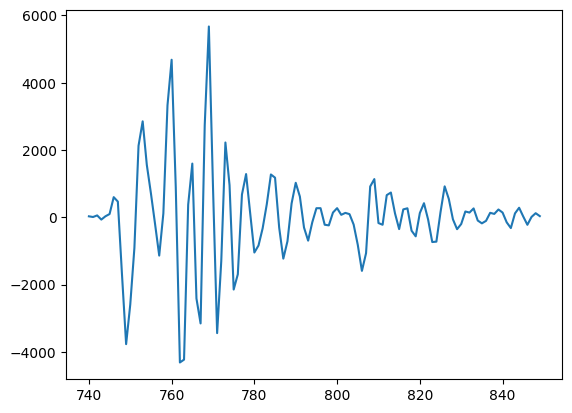

In [22]:
residual.iloc[0][740:850].plot()

<Axes: >

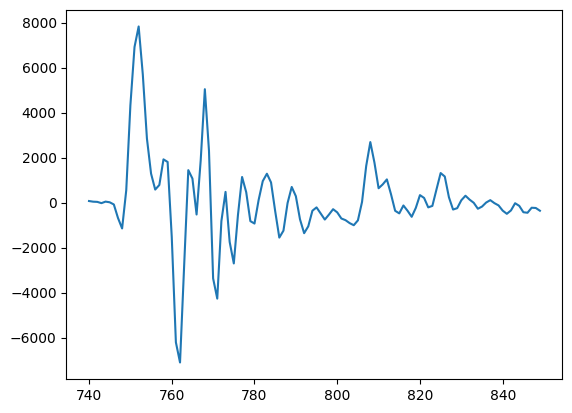

In [23]:
raw_data.iloc[0][740:850].plot()

이것도 그림이 약간 아닌거 같은디...

## Abs, Normalized

<Axes: >

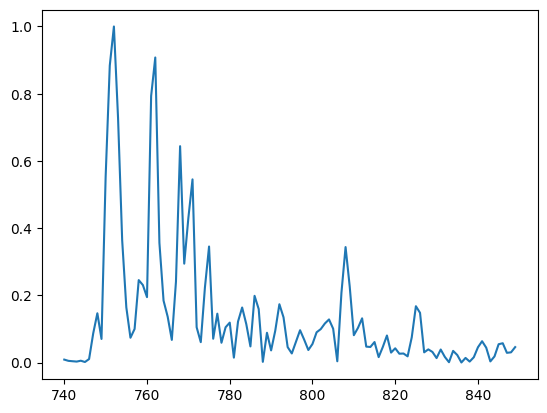

In [24]:
abs_normalized_data = raw_data.abs()
abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
abs_normalized_data.iloc[0][740:850].plot()

얼추 비슷해진듯

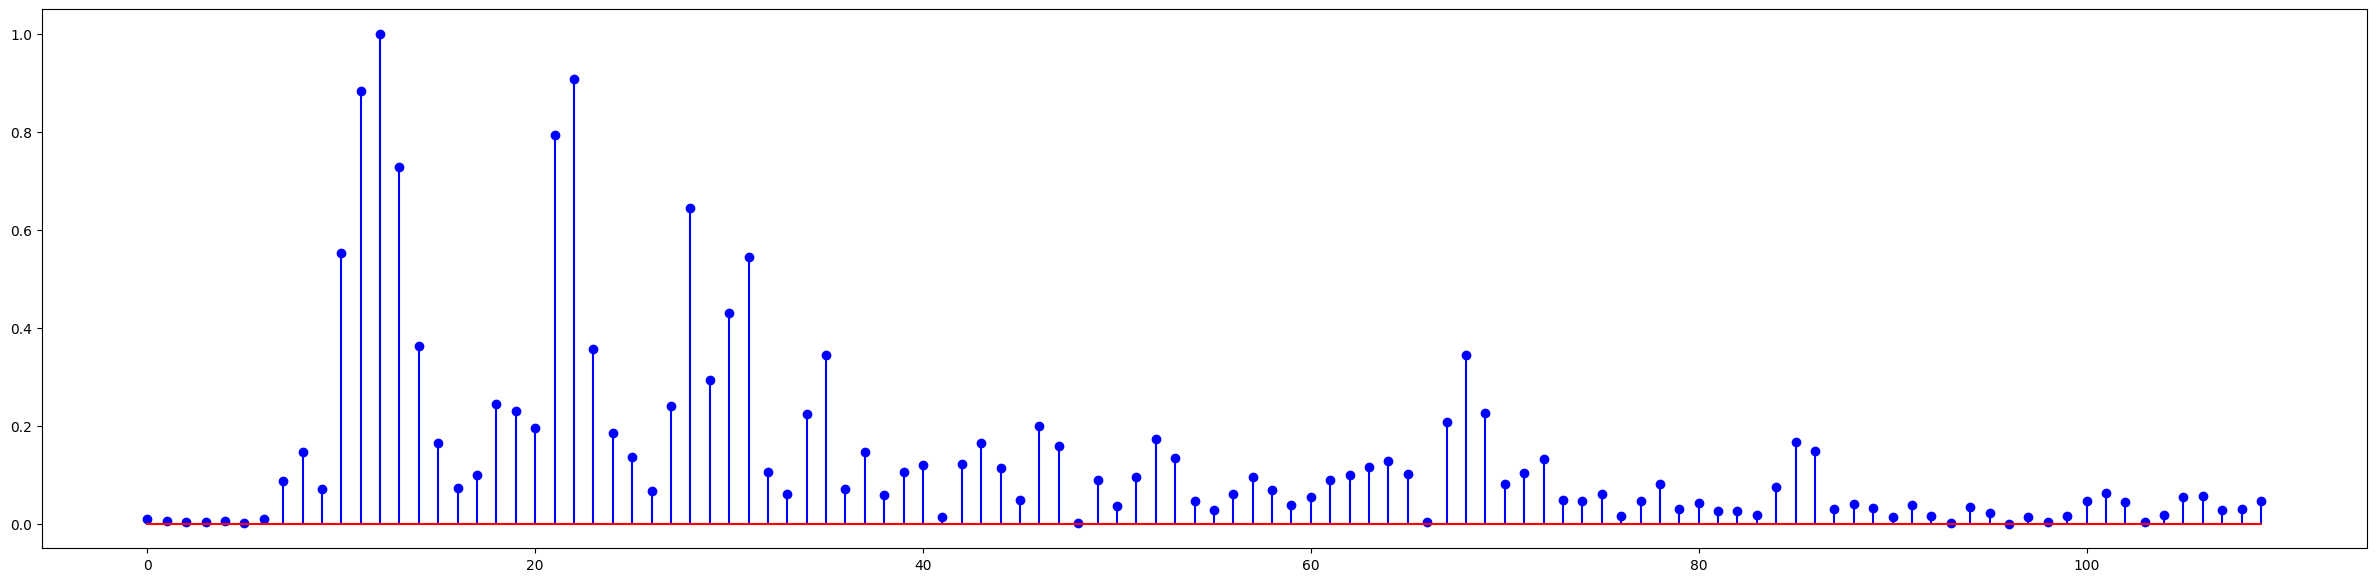

In [25]:
# 그래프 모양을 약간 보기좋게
plt.figure(figsize=(30, 7))
plt.stem(abs_normalized_data.iloc[0][740:850], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

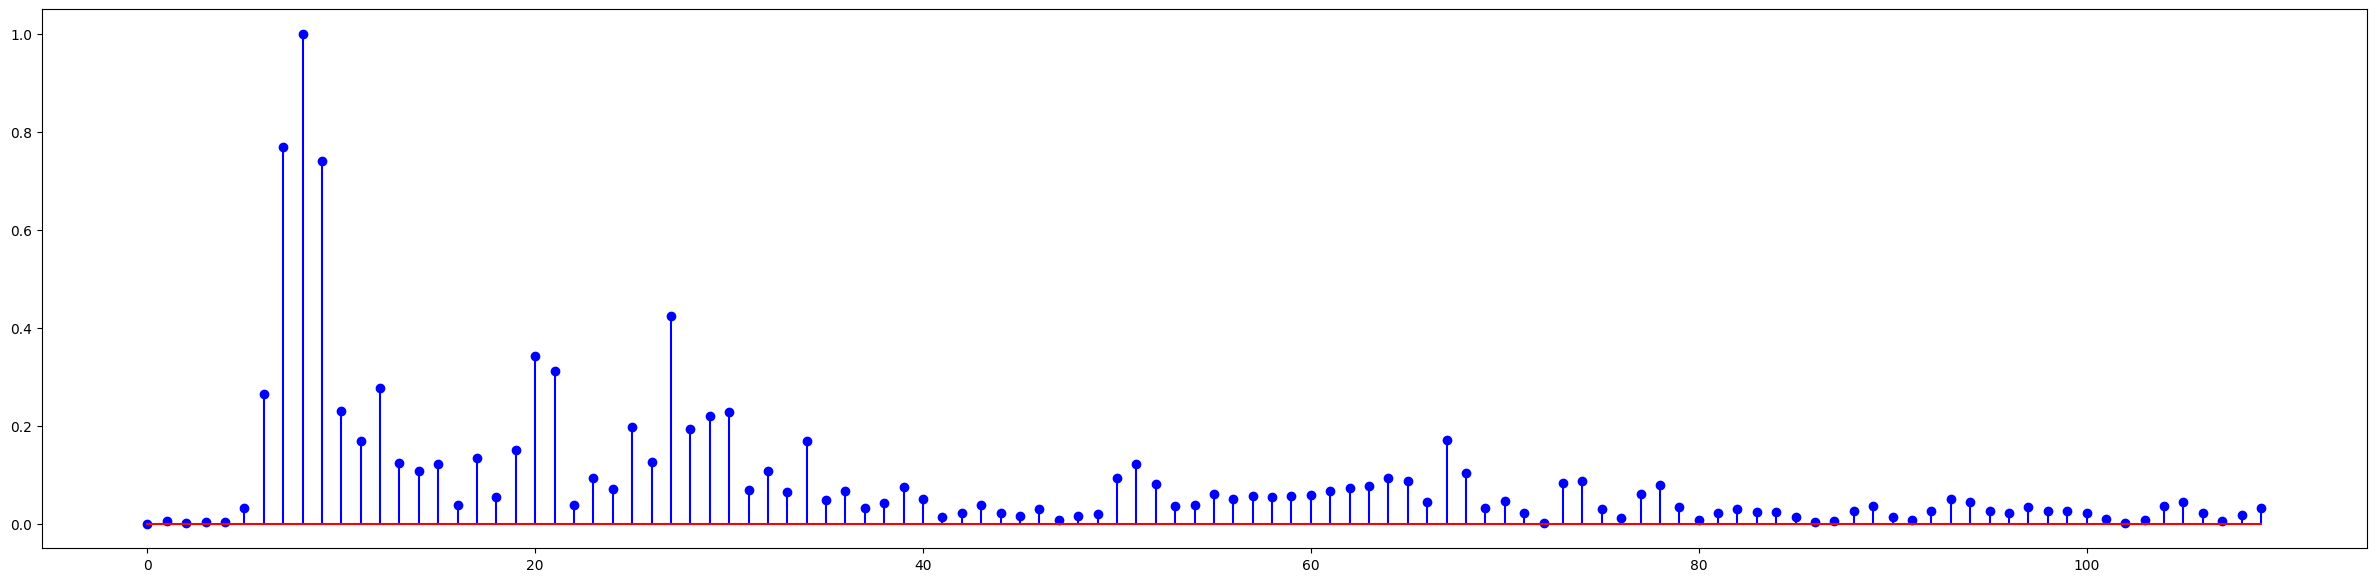

In [26]:
# 이부분은 사람이 있던 경우로 아마 추정
plt.figure(figsize=(30, 7))
plt.stem(abs_normalized_data.iloc[70][740:850], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

솔직히 한두개 봐서는 모르겠음, 그냥 plot으로 중첩해서 봐야할 듯

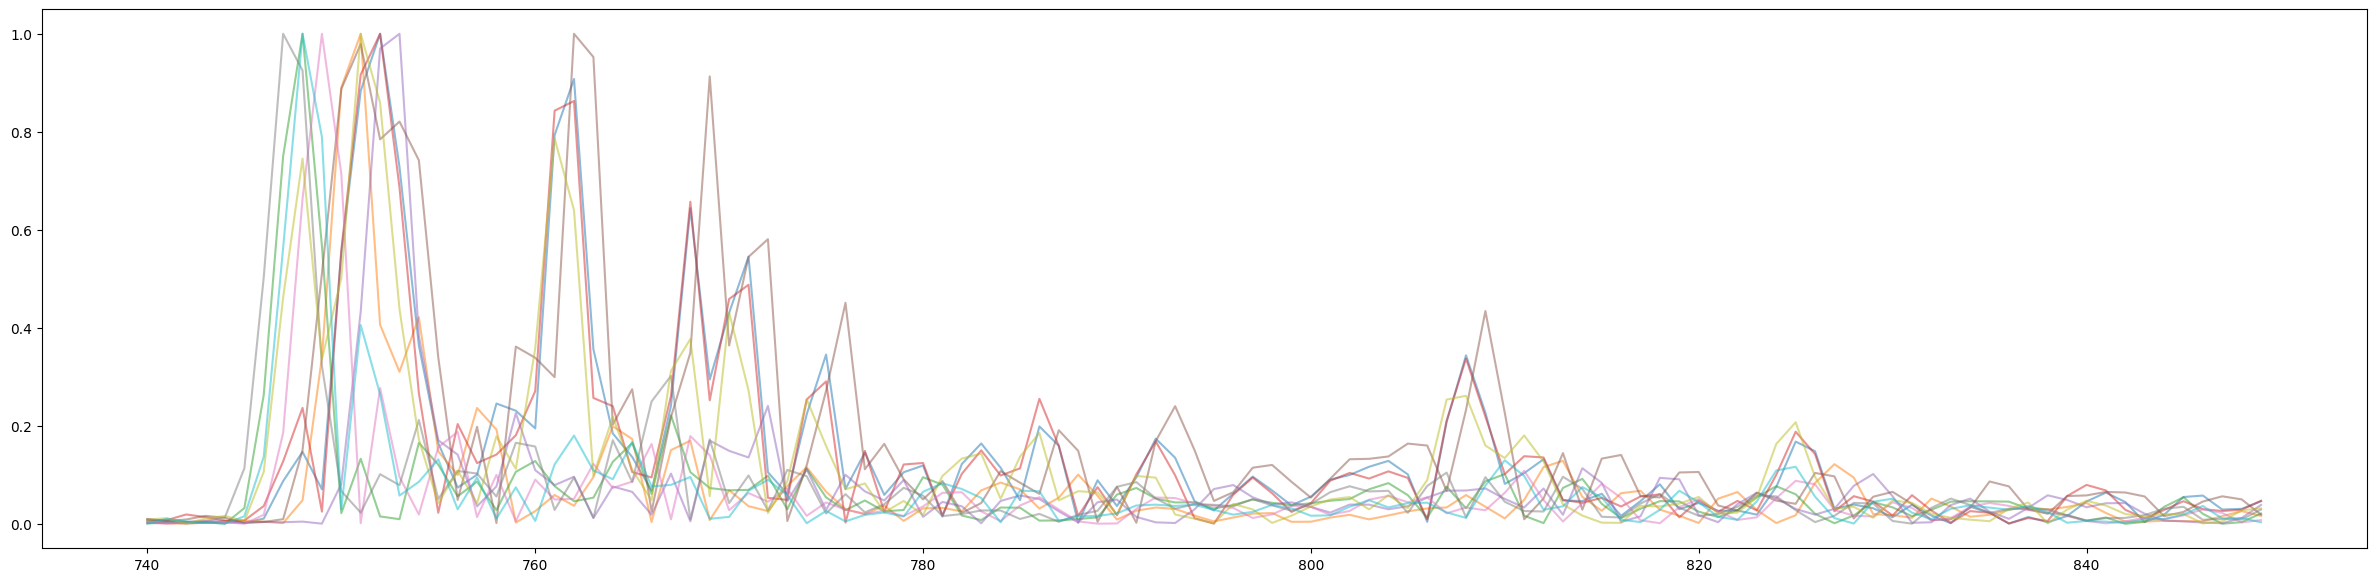

In [27]:
plt.figure(figsize=(30, 7))
for i in range(10):
    plt.plot(abs_normalized_data.iloc[i][740:850], alpha=0.5)
plt.show()

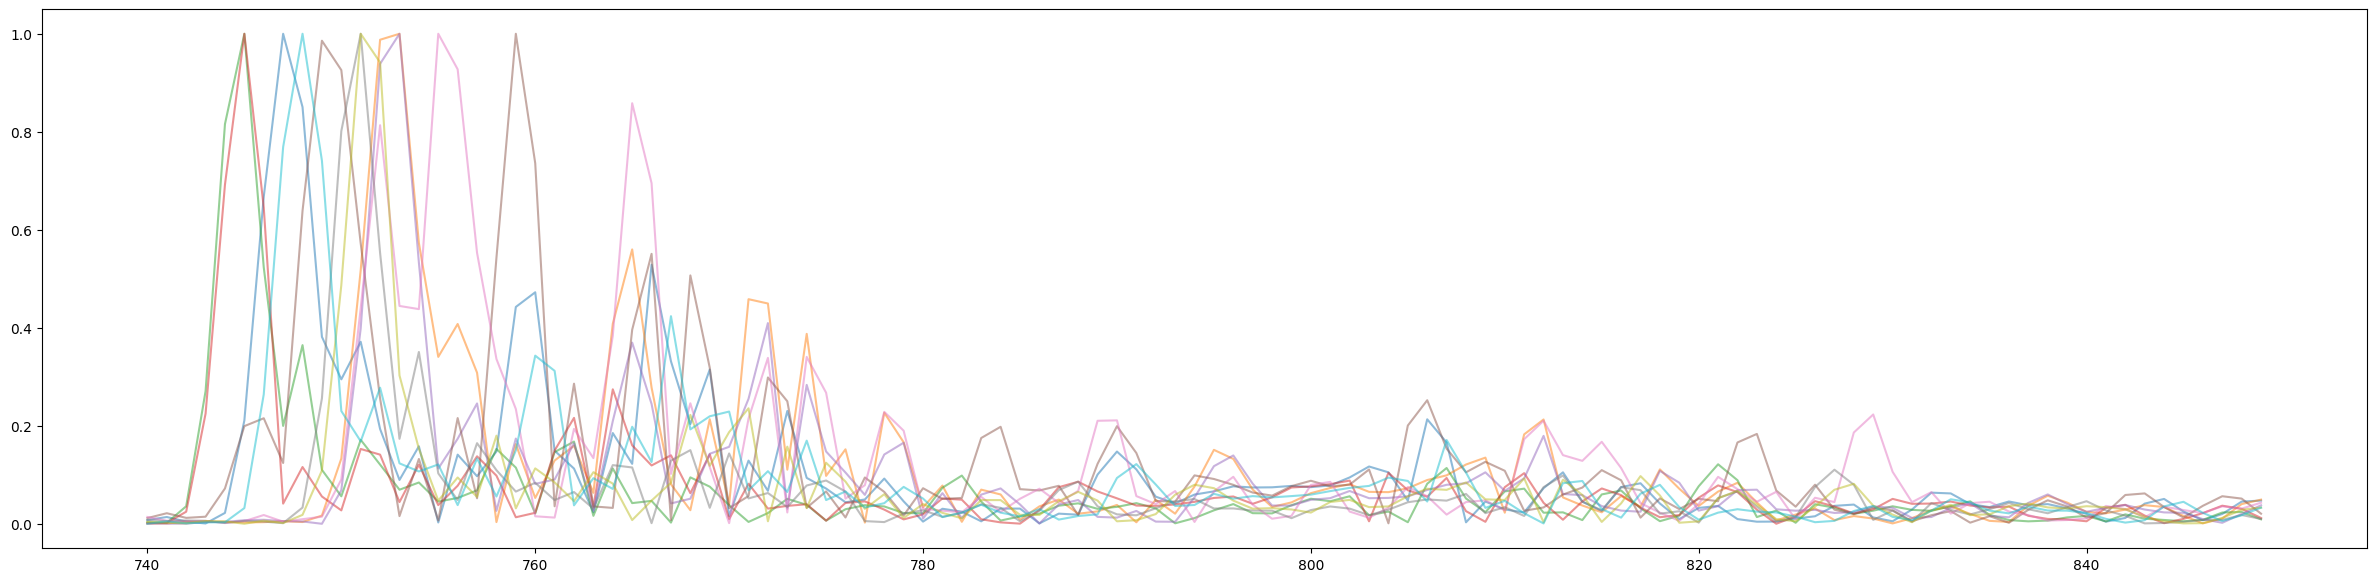

In [28]:
plt.figure(figsize=(30, 7))
for i in range(61, 71):
    plt.plot(abs_normalized_data.iloc[i][740:850], alpha=0.5)
plt.show()

본 논문에서는 dicision tree와 naive bayes classifier를 사용해 분석함, 이때 y값은 사람의 수

In [29]:
abs_normal_740_850 = abs_normalized_data.iloc[:, 740:850]
print(abs_normal_740_850.shape)
abs_normal_740_850.head()

(101, 110)


,740,741,742,743,744,745,746,747,748,749,...,840,841,842,843,844,845,846,847,848,849
0,0.008945,0.005239,0.004089,0.003067,0.005622,0.001789,0.010606,0.087145,0.146818,0.070406,...,0.045617,0.063634,0.044467,0.003578,0.018400,0.054689,0.057628,0.029134,0.030539,0.046128
1,0.002917,0.000669,0.000425,0.002249,0.005227,0.006503,0.004741,0.001459,0.048016,0.339756,...,0.042363,0.022063,0.004741,0.004558,0.006199,0.005592,0.005166,0.015620,0.025892,0.016228
2,0.000731,0.002374,0.003105,0.003470,0.000122,0.032085,0.263196,0.750015,1.000000,0.567184,...,0.006271,0.012907,0.000061,0.003957,0.034521,0.054307,0.020396,0.000183,0.003409,0.021065
3,0.007494,0.007494,0.019052,0.013591,0.006859,0.006605,0.036327,0.127397,0.236505,0.024895,...,0.079385,0.068081,0.028579,0.011050,0.028198,0.046107,0.029849,0.026165,0.028706,0.046996
4,0.002247,0.002854,0.000911,0.002490,0.001943,0.002733,0.003765,0.003219,0.004494,0.000304,...,0.033764,0.041963,0.042266,0.020465,0.006498,0.004919,0.002551,0.001154,0.011903,0.038501


In [30]:
# Na 확인
abs_normal_740_850.isna().sum()
# NaN 위치 확인
abs_normal_740_850[abs_normal_740_850.isna().any(axis=1)]

,740,741,742,743,744,745,746,747,748,749,...,840,841,842,843,844,845,846,847,848,849
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# NaN 제거
abs_normal_740_850 = abs_normal_740_850.dropna()

In [32]:
# 우리는 비지도 학습을 통해 cluster를 찾아내고자 한다.
from sklearn.cluster import KMeans

# cluster의 개수를 2개로 설정
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000)
kmeans.fit(abs_normal_740_850)

c:\Users\stand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [33]:
abs_normal_740_850["cluster"] = kmeans.labels_

In [34]:
abs_normal_740_850.head()

,740,741,742,743,744,745,746,747,748,749,...,841,842,843,844,845,846,847,848,849,cluster
0,0.008945,0.005239,0.004089,0.003067,0.005622,0.001789,0.010606,0.087145,0.146818,0.070406,...,0.063634,0.044467,0.003578,0.018400,0.054689,0.057628,0.029134,0.030539,0.046128,1
1,0.002917,0.000669,0.000425,0.002249,0.005227,0.006503,0.004741,0.001459,0.048016,0.339756,...,0.022063,0.004741,0.004558,0.006199,0.005592,0.005166,0.015620,0.025892,0.016228,1
2,0.000731,0.002374,0.003105,0.003470,0.000122,0.032085,0.263196,0.750015,1.000000,0.567184,...,0.012907,0.000061,0.003957,0.034521,0.054307,0.020396,0.000183,0.003409,0.021065,0
3,0.007494,0.007494,0.019052,0.013591,0.006859,0.006605,0.036327,0.127397,0.236505,0.024895,...,0.068081,0.028579,0.011050,0.028198,0.046107,0.029849,0.026165,0.028706,0.046996,1
4,0.002247,0.002854,0.000911,0.002490,0.001943,0.002733,0.003765,0.003219,0.004494,0.000304,...,0.041963,0.042266,0.020465,0.006498,0.004919,0.002551,0.001154,0.011903,0.038501,1


In [35]:
group_1 = abs_normal_740_850[abs_normal_740_850["cluster"] == 0]
group_2 = abs_normal_740_850[abs_normal_740_850["cluster"] == 1]

In [36]:
group_1.shape, group_2.shape

((56, 111), (44, 111))

In [37]:
# gruop_1의 index를 확인
group_1.index, group_2.index

(Index([  2,   6,   7,   9,  14,  16,  17,  18,  19,  22,  23,  24,  28,  29,
         32,  34,  35,  37,  40,  46,  50,  51,  52,  53,  54,  55,  58,  59,
         60,  61,  63,  64,  66,  70,  71,  73,  75,  76,  77,  79,  80,  81,
         84,  85,  86,  87,  88,  90,  91,  92,  93,  94,  95,  97,  98, 100],
       dtype='int64'),
 Index([ 0,  1,  3,  4,  5,  8, 10, 11, 12, 13, 15, 20, 21, 25, 26, 27, 30, 31,
        33, 36, 38, 39, 41, 42, 43, 44, 47, 48, 49, 56, 57, 62, 65, 67, 68, 69,
        72, 74, 78, 82, 83, 89, 96, 99],
       dtype='int64'))

k-means로는 당연하게도 두개의 cluster가 이상하게 분류됨  
따라서, 다른 clustering 방법을 더 찾아보거나, 논문에서와 같이 지도학습을 해보는 것도 괜찮은 방법일 듯  
-> 장연씨가 다른 clustering 방법을 하고/ 나는 지도학습 시켜서, 두개의 차이를 유의미하게 분류할 수 있게 해보는 방향?

# ResNet

연구의 목표: 실내 로봇끼리는 Ranging중, 환경 탐지에 대해 안보이는 곳에 대한 탐지를 하자

비지도 학습으로는 터무니 없게 나와서 사실 결과를 측정할 동기조차 없었음, 그래서 resnet을 통해 지도학습 할 예정.  
현재는 데이터가 약간 불완전한 경향이 있어서, 임시로 측정시에 앞부분은 사람이 없었고, 뒷부분은 사람이 있었다고 가정하에 시행하겠음

In [38]:
y_label = [0] * 50 + [1] * 50
y_label[45:55]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

## 학습할 이미지 저장하기

### raw data

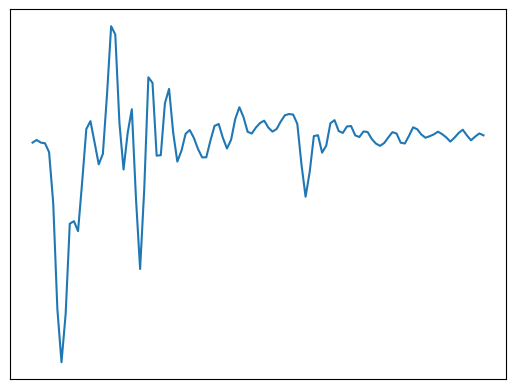

In [39]:
# for i in range(len(data_log)):
for i in range(len(raw_data)):
    plt.clf()
    plt.plot(raw_data.iloc[i][740:850])
    plt.gca().axes.get_xaxis().set_visible(False)   # x축 숨기기
    plt.gca().axes.get_yaxis().set_visible(False)   # y축 숨기기
    plt.savefig("data/raw_data_" + str(i) + ".jpeg", format="jpeg", pad_inches=0.0, bbox_inches="tight")  # 그래프를 이미지로 저장, 224*224

### size, normalize 전처리

In [45]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.transforms import Resize, ToTensor, Normalize

In [46]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:37<00:00, 702623.60it/s] 


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 87143.78it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:10<00:00, 419797.33it/s] 


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [47]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [49]:
training_data.targets.shape

torch.Size([60000])

In [42]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [43]:
image_folder = datasets.ImageFolder("data", transform=transform)

FileNotFoundError: Couldn't find any class folder in data.

### model 정의

In [ ]:
import torch
import torch.nn as nn
try:
    from torch.hub import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


def resnet34(pretrained=False, progress=True, **kwargs):
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet50(pretrained=False, progress=True, **kwargs):
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet101(pretrained=False, progress=True, **kwargs):
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)


def resnet152(pretrained=False, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)


def resnext50_32x4d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_

    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_

    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)

In [ ]:
data_path = "data/"

train_data = 